In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, _tree
from prune import prune_tree

In [4]:
df = pd.read_csv('../data/spambase_augmented.csv')

DEPTH = 4

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


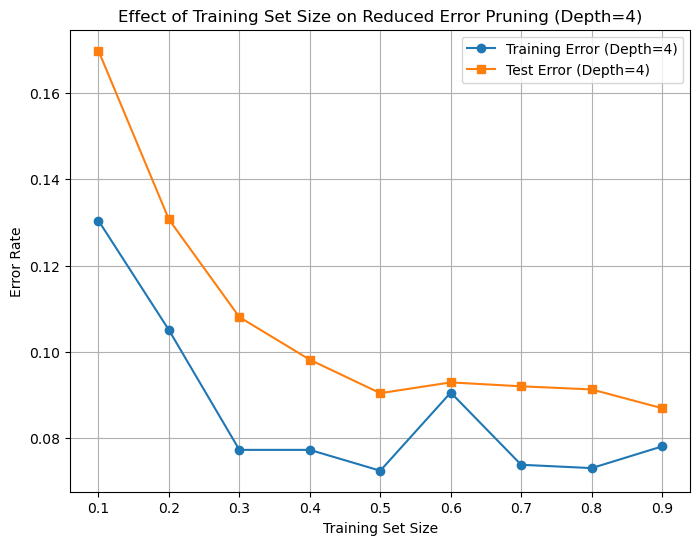

In [6]:
train_sizes = np.linspace(0.1, 0.9, 9)  # Train sizes from 10% to 90%
four_train_error = []
four_test_error = []
max_depth = 4

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Ensure validation set is at least 3 samples (since we have 3 classes)
    val_size = max(3, int(0.1 * len(X_train)))

    if len(X_train) > val_size:
        stratify_option = y_train if len(set(y_train)) == len(set(y)) else None
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42, stratify=stratify_option)
    else:
        X_val, y_val = X_train, y_train  # Use entire training set as validation if too small

    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    four_train_error.append(cur_training_err)
    four_test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, four_train_error, label="Training Error (Depth=4)", marker='o', linestyle='-')
plt.plot(train_sizes, four_test_error, label="Test Error (Depth=4)", marker='s', linestyle='-')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Effect of Training Set Size on Reduced Error Pruning (Depth=4)")
plt.legend()
plt.grid(True)
plt.show()

DEPTH = 8

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


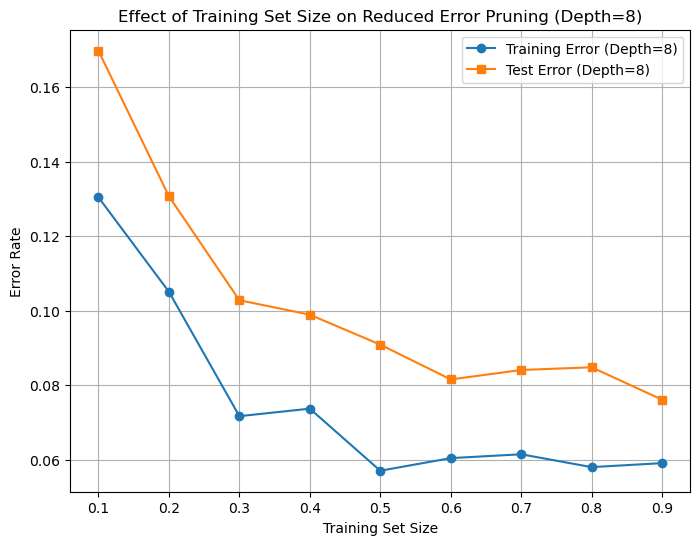

In [8]:
train_sizes = np.linspace(0.1, 0.9, 9)  # Train sizes from 10% to 90%
eight_train_error = []
eight_test_error = []
max_depth = 8

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Ensure validation set is at least 3 samples (since we have 3 classes)
    val_size = max(3, int(0.1 * len(X_train)))

    if len(X_train) > val_size:
        stratify_option = y_train if len(set(y_train)) == len(set(y)) else None
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42, stratify=stratify_option)
    else:
        X_val, y_val = X_train, y_train  # Use entire training set as validation if too small

    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    eight_train_error.append(cur_training_err)
    eight_test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, eight_train_error, label="Training Error (Depth=8)", marker='o', linestyle='-')
plt.plot(train_sizes, eight_test_error, label="Test Error (Depth=8)", marker='s', linestyle='-')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Effect of Training Set Size on Reduced Error Pruning (Depth=8)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print('training error for max_depth=4' , four_train_error)
print('training error for max_depth=8' , eight_train_error)
print('test error for max_depth=4' , four_test_error)
print('test error for max_depth=8' , eight_test_error)

training error for max_depth=4 [0.13043478260869568, 0.10507246376811596, 0.07729468599033817, 0.07729468599033817, 0.07246376811594202, 0.0905797101449275, 0.07384403036576948, 0.07306763285024154, 0.0780998389694042]
training error for max_depth=8 [0.13043478260869568, 0.10507246376811596, 0.07165861513687599, 0.07367149758454106, 0.05700483091787445, 0.06038647342995174, 0.06142167011732225, 0.05797101449275366, 0.05904455179817503]
test error for max_depth=4 [0.1698067632850242, 0.13070652173913044, 0.10807453416149071, 0.09818840579710142, 0.09043478260869564, 0.0929347826086957, 0.09202898550724636, 0.09130434782608698, 0.08695652173913049]
test error for max_depth=8 [0.1698067632850242, 0.13070652173913044, 0.1027950310559006, 0.09891304347826091, 0.09086956521739131, 0.08152173913043481, 0.08405797101449275, 0.08478260869565213, 0.07608695652173914]
